In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('mushrooms.csv')
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
dataset['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [5]:
dataset['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [6]:
#replace missing with bulbous
dataset['stalk-root'].replace('?', 'b', inplace = True)

In [7]:
dataset['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [8]:
mappings = list()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in range(0,23):
    dataset[dataset.columns[column]] = le.fit_transform(dataset[dataset.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

In [9]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [10]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y'},
 {0:

In [11]:
X = dataset.drop('class',axis=1)
y = dataset['class']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [13]:
y_train.unique()

array([1, 0])

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score,roc_auc_score,plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate


## Logistic Regression

In [15]:
LRclassifier = LogisticRegression(solver='lbfgs', max_iter=400,random_state=42)
LRclassifier.fit(X_train, y_train)

LogisticRegression(max_iter=400, random_state=42)

In [16]:
LRpred = LRclassifier.predict(X_test)
LR_report = classification_report(y_test, LRpred, output_dict = True)
crLReg = pd.DataFrame(LR_report).transpose()
crLReg

,precision,recall,f1-score,support
0,0.956564,0.952885,0.954721,1040.000000
1,0.950754,0.954591,0.952669,991.000000
accuracy,0.953717,0.953717,0.953717,0.953717
macro avg,0.953659,0.953738,0.953695,2031.000000
weighted avg,0.953729,0.953717,0.953719,2031.000000


## Naive Bayes

In [17]:
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)
NBpred = NBclassifier.predict(X_test)
NB_report = classification_report(y_test, NBpred, output_dict = True)
crNB = pd.DataFrame(NB_report).transpose()
crNB

,precision,recall,f1-score,support
0,0.908390,0.905769,0.907078,1040.000000
1,0.901408,0.904137,0.902771,991.000000
accuracy,0.904973,0.904973,0.904973,0.904973
macro avg,0.904899,0.904953,0.904924,2031.000000
weighted avg,0.904983,0.904973,0.904976,2031.000000


## Decision tree

In [21]:
DTclassifier = DecisionTreeClassifier(criterion='entropy',random_state=42)
DTclassifier.fit(X_train, y_train)
DTpred = DTclassifier.predict(X_test)
DT_report = classification_report(y_test, DTpred, output_dict = True)
crDT = pd.DataFrame(DT_report).transpose()
crDT

,precision,recall,f1-score,support
0,1.0,1.0,1.0,1040.0
1,1.0,1.0,1.0,991.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,2031.0
weighted avg,1.0,1.0,1.0,2031.0


## KNN

In [82]:
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train, y_train)
KNNpred = KNNclassifier.predict(X_test)
KNN_report = classification_report(y_test, KNNpred, output_dict = True)
crKNN = pd.DataFrame(KNN_report).transpose()
crKNN

,precision,recall,f1-score,support
0,0.999033,0.993269,0.996143,1040.000000
1,0.992979,0.998991,0.995976,991.000000
accuracy,0.996061,0.996061,0.996061,0.996061
macro avg,0.996006,0.996130,0.996059,2031.000000
weighted avg,0.996079,0.996061,0.996061,2031.000000


## random forest

In [28]:
RFclassifier = RandomForestClassifier(n_estimators=10 , random_state=42)
RFclassifier.fit(X_train, y_train)
RFpred = RFclassifier.predict(X_test)
RF_report = classification_report(y_test, RFpred, output_dict = True)
crRF = pd.DataFrame(RF_report).transpose()
crRF

,precision,recall,f1-score,support
0,1.0,1.0,1.0,1040.0
1,1.0,1.0,1.0,991.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,2031.0
weighted avg,1.0,1.0,1.0,2031.0


## SVC

In [76]:
SVCclassifier = SVC(kernel = 'poly',random_state=42)
SVCclassifier.fit(X_train, y_train)
SVCpred = SVCclassifier.predict(X_test)
SVC_report = classification_report(y_test, SVCpred, output_dict = True)
crSVC = pd.DataFrame(SVC_report).transpose()
crSVC

,precision,recall,f1-score,support
0,0.998081,1.000000,0.999039,1040.000000
1,1.000000,0.997982,0.998990,991.000000
accuracy,0.999015,0.999015,0.999015,0.999015
macro avg,0.999040,0.998991,0.999015,2031.000000
weighted avg,0.999017,0.999015,0.999015,2031.000000


<ipython-input-77-a75870303810>:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


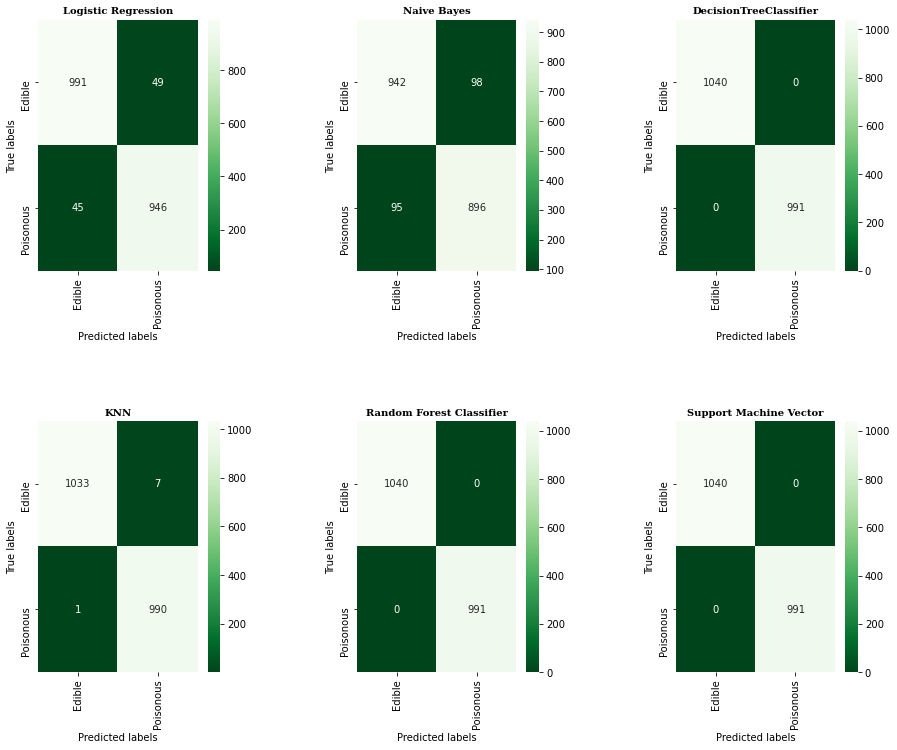

In [77]:
import seaborn as sns
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.6, hspace=0.6)


ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
#logistic reg
cmLReg = confusion_matrix(y_test, LRpred)
sns.heatmap(cmLReg, annot=True,ax=ax0,fmt='d',cmap='Greens_r')
ax0.set_xlabel('Predicted labels')
ax0.set_ylabel('True labels') 
ax0.set_title('Logistic Regression',fontsize=10,fontfamily='serif',fontweight='bold')
ax0.xaxis.set_ticklabels(['Edible','Poisonous'],rotation='vertical') 
ax0.yaxis.set_ticklabels(['Edible','Poisonous'],rotation='vertical')
#Naive Bayes
cmGNB = confusion_matrix(y_test, NBpred)
sns.heatmap(cmGNB, annot=True,ax=ax1,fmt='d',cmap='Greens_r')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels') 
ax1.set_title('Naive Bayes',fontsize=10,fontfamily='serif',fontweight='bold')
ax1.xaxis.set_ticklabels(['Edible','Poisonous'],rotation='vertical') 
ax1.yaxis.set_ticklabels(['Edible','Poisonous'],rotation='vertical')
#Decision Tree Classifier
cmDTC = confusion_matrix(y_test, DTpred)
sns.heatmap(cmDTC, annot=True,ax=ax2,fmt='d',cmap='Greens_r')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels') 
ax2.set_title('DecisionTreeClassifier',fontsize=10,fontfamily='serif',fontweight='bold')
ax2.xaxis.set_ticklabels(['Edible','Poisonous'],rotation='vertical') 
ax2.yaxis.set_ticklabels(['Edible','Poisonous'],rotation='vertical')
#KNN
cmKNN = confusion_matrix(y_test, KNNpred)
sns.heatmap(cmKNN, annot=True,ax=ax3,fmt='d',cmap='Greens_r')
ax3.set_xlabel('Predicted labels')
ax3.set_ylabel('True labels') 
ax3.set_title('KNN',fontsize=10,fontfamily='serif',fontweight='bold')
ax3.xaxis.set_ticklabels(['Edible','Poisonous'],rotation='vertical') 
ax3.yaxis.set_ticklabels(['Edible','Poisonous'],rotation='vertical')
#RFC
cmRFC = confusion_matrix(y_test, RFpred)
sns.heatmap(cmRFC, annot=True,ax=ax4,fmt='d',cmap='Greens_r')
ax4.set_xlabel('Predicted labels')
ax4.set_ylabel('True labels') 
ax4.set_title('Random Forest Classifier',fontsize=10,fontfamily='serif',fontweight='bold')
ax4.xaxis.set_ticklabels(['Edible','Poisonous'],rotation='vertical') 
ax4.yaxis.set_ticklabels(['Edible','Poisonous'],rotation='vertical')
#SVM
cmSVC = confusion_matrix(y_test, SVCpred)
sns.heatmap(cmRFC, annot=True,ax=ax5,fmt='d',cmap='Greens_r')
ax5.set_xlabel('Predicted labels')
ax5.set_ylabel('True labels') 
ax5.set_title('Support Machine Vector',fontsize=10,fontfamily='serif',fontweight='bold')
ax5.xaxis.set_ticklabels(['Edible','Poisonous'],rotation='vertical') 
ax5.yaxis.set_ticklabels(['Edible','Poisonous'],rotation='vertical')

fig.show()

# Cross validation score - KNN best model in this case

In [79]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = KNNclassifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.80 %
Standard Deviation: 0.10 %


In [84]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = SVCclassifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.75 %
Standard Deviation: 0.34 %


In [86]:
# rough work to try method get_dummies
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [89]:
encoded_columns = pd.get_dummies(df['cap-shape'])


In [90]:
encoded_columns

,b,c,f,k,s,x
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
8119,0,0,0,1,0,0
8120,0,0,0,0,0,1
8121,0,0,1,0,0,0
8122,0,0,0,1,0,0
